# London Bike Sharing (Part 1)

# Exploratory Data Analysis and Tableau Dashboard

**The London Bike Sharing Dataset contains 17414 rows, is a comprehensive collection of data related to the bike-sharing system in London, United Kingdom. It provides valuable insights into the usage patterns, trends, and dynamics of the bike-sharing service, offering an opportunity to explore and analyze various aspects of urban transportation.**

In [1]:
# import required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
#display plots directly within the notebook
%matplotlib inline 

import seaborn as sns

In [2]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


# Explore the data
## Features:
- **"timestamp"** - timestamp field for grouping the data
- **"cnt"** - the count of new bike shares
- **"t1"** - the real temperature in C
- **"t2"** - the temperature in C "feels like"
- **"hum"** - humidity in percentage
- **"wind_speed"** - wind speed in km/h
- **"is_holiday"** - boolean field - 1 holiday / 0 non-holiday
- **"is_weekend**" - boolean field - 1 if the day is weekend
- **"season"** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
- **"weather_code"** - category of the weather
    - **1** = Clear; mostly clear but have some values with haze/fog/patches of fog/ fog in the vicinity.
    - **2** = scattered clouds / few clouds.
    - **3** = Broken clouds.
    - **4** = Cloudy.
    - **7** = Rain/ light Rain shower/ Light rain. 
    - **10** = rain with thunderstorm.
    - **26** = snowfall. 
    - **94** = Freezing Fog.

In [4]:
bikes.shape

(17414, 10)

In [5]:
bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [8]:
# count the unique values in the season column
bikes.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

# Null values check

In [9]:
# check for missing values
bikes.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

# Check for duplicated values

In [10]:
bikes.duplicated().sum()

0

# Data Transformation

# Changing column names

In [11]:
# specifying the column names that I want to use
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [13]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

 # Changing datatypes

In [12]:
# changing the humidity values to percentage (i.e. a value between 0 and 1)
bikes.humidity_percent = bikes.humidity_percent / 100

In [14]:
# Convert timestamp to pandas datetime data type
bikes['time'] = pd.to_datetime(bikes['time'])

In [15]:
# split timestamp into hour and date
bikes['date'] = bikes['time'].apply(lambda x: x.date())
bikes['hour'] = bikes['time'].apply(lambda x: x.hour)
bikes['month'] = bikes['time'].apply(lambda x: x.month)

In [16]:
# checking our dataframe to see if the mappings have worked
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date,hour,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015-01-04,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015-01-04,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015-01-04,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015-01-04,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015-01-04,4,1


# Checking ouliers in Target varibale "count"

In [17]:
Q1 = bikes['count'].quantile(0.25)
Q3 = bikes['count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = bikes[(bikes['count'] < lower_bound) | (bikes['count'] > upper_bound)]
outliers.value_counts().sum()

675

# Removing Outliers

In [18]:
#removing outliers
bikes = bikes[(bikes['count'] >= lower_bound) & (bikes['count'] <= upper_bound)]
print("shape after outliers removal :",bikes.shape)

shape after outliers removal : (16739, 13)


# Saving Dataframe to 'xlsx' file

In [31]:
# writing the final dataframe to an excel file that we will use in a Tableau visualisations. 
# The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'
bikes.to_excel('london_bikes_final_EDA.xlsx', sheet_name='Data')

# Insights

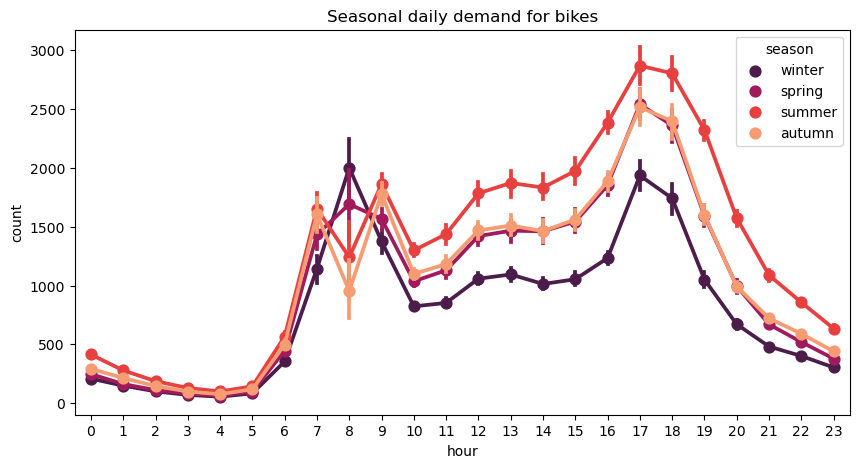

In [20]:
# Visualize bike share demand
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=bikes, 
              x='hour', y='count', hue='season',
              ax=ax, palette='rocket', markers='o')
ax.set(title="Seasonal daily demand for bikes");

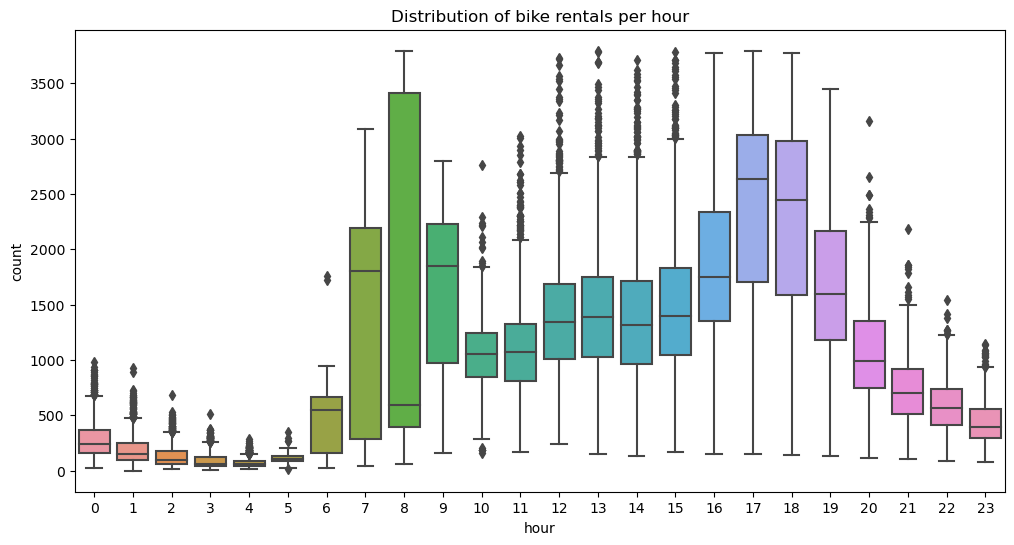

In [21]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hour', y='count', data=bikes)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**As we can see above, bike share demand is highest around rush hour 7 to 9 am and 5 to 7pm. Also bike demand is highest around the summer. Bike demand is lowest in the winter.**

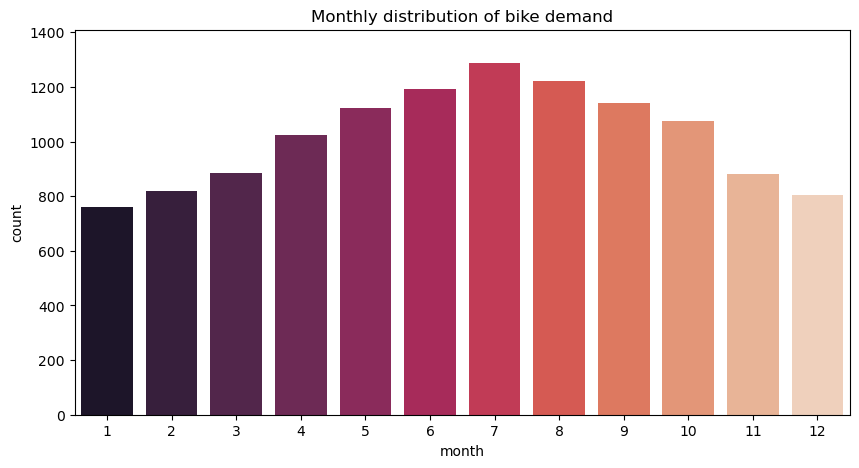

In [32]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=bikes, x="month",y="count",linewidth=0,  palette='rocket')
ax.set(title="Monthly distribution of bike demand")

# Removing potential annotations or extra lines
for artist in ax.lines + ax.collections:
    artist.remove()

plt.show()

**The bike demand is highest around the summer months same as in the seasonality chart from above.**

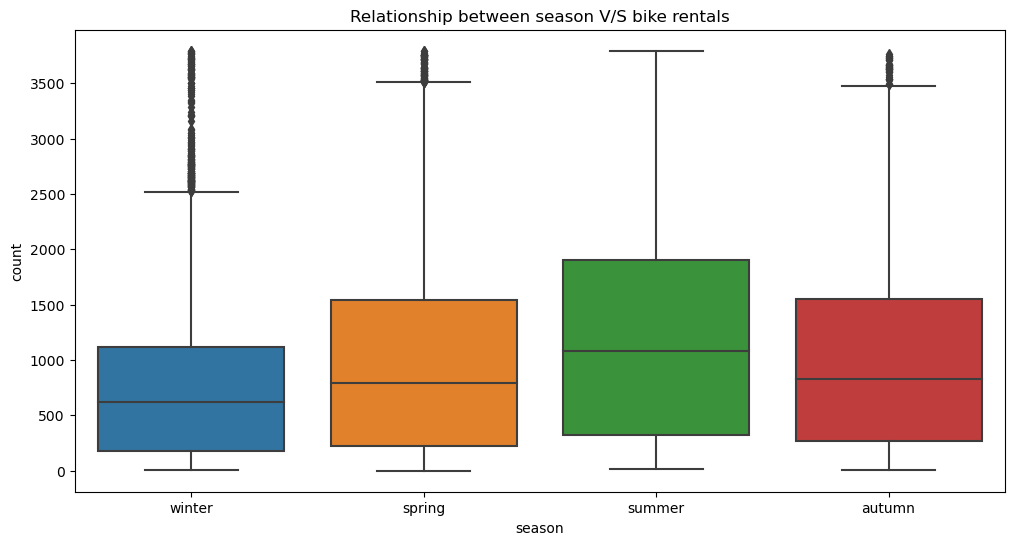

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='count', data=bikes)
plt.title('Relationship between season V/S bike rentals')
plt.show()

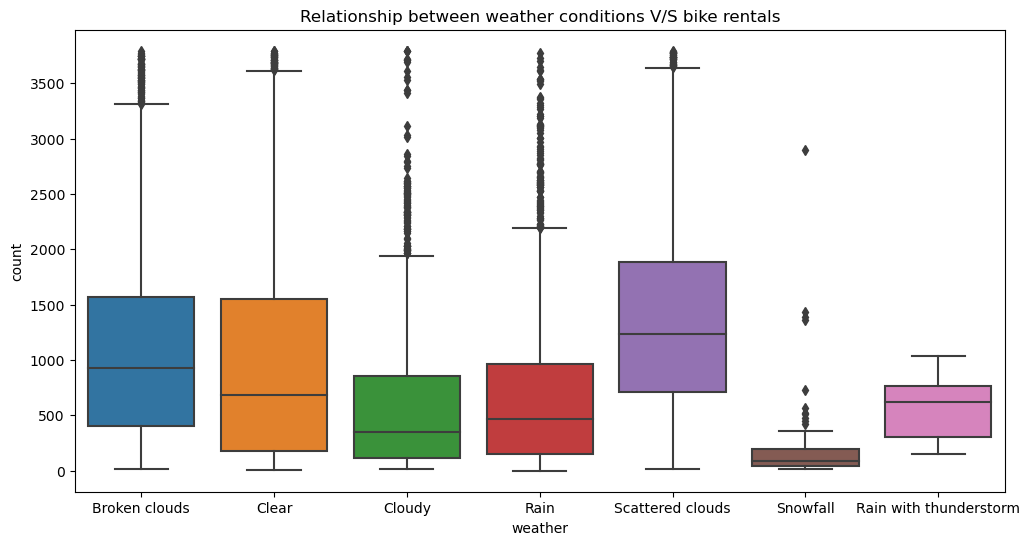

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weather', y='count', data=bikes)
plt.title('Relationship between weather conditions V/S bike rentals')
plt.show()

# Correlation matrix and Heatmap

In [25]:
bikes_corr = bikes.corr(numeric_only=True)
bikes_corr

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend,hour,month
count,1.000000,0.377666,0.357047,-0.492237,0.138863,-0.042231,-0.043720,0.386543,0.045390
temp_real_C,0.377666,1.000000,0.988063,-0.423683,0.143091,-0.038884,0.005353,0.152593,0.337993
temp_feels_like_C,0.357047,0.988063,1.000000,-0.379529,0.083950,-0.036700,0.002028,0.138566,0.373230
humidity_percent,-0.492237,-0.423683,-0.379529,1.000000,-0.289045,0.028978,0.021836,-0.282748,0.118310
wind_speed_kph,0.138863,0.143091,0.083950,-0.289045,1.000000,-0.002225,0.013673,0.137184,-0.086764
is_holiday,-0.042231,-0.038884,-0.036700,0.028978,-0.002225,1.000000,-0.099033,0.000648,-0.010290
is_weekend,-0.043720,0.005353,0.002028,0.021836,0.013673,-0.099033,1.000000,0.003313,-0.001194
hour,0.386543,0.152593,0.138566,-0.282748,0.137184,0.000648,0.003313,1.000000,-0.001519
month,0.045390,0.337993,0.373230,0.118310,-0.086764,-0.010290,-0.001194,-0.001519,1.000000


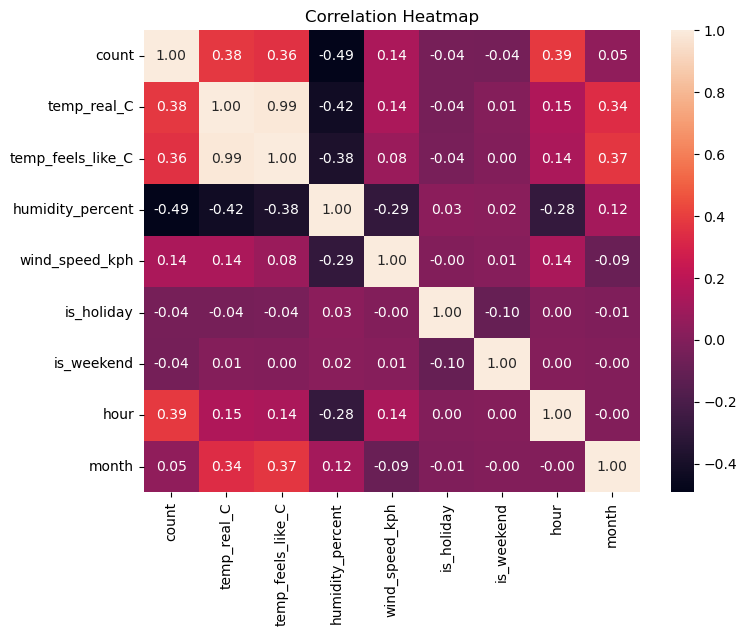

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(bikes_corr, annot=True, fmt='.2f')  # Set fmt='.2f' for 2 decimal places
ax.set(title="Correlation Heatmap")
plt.show()

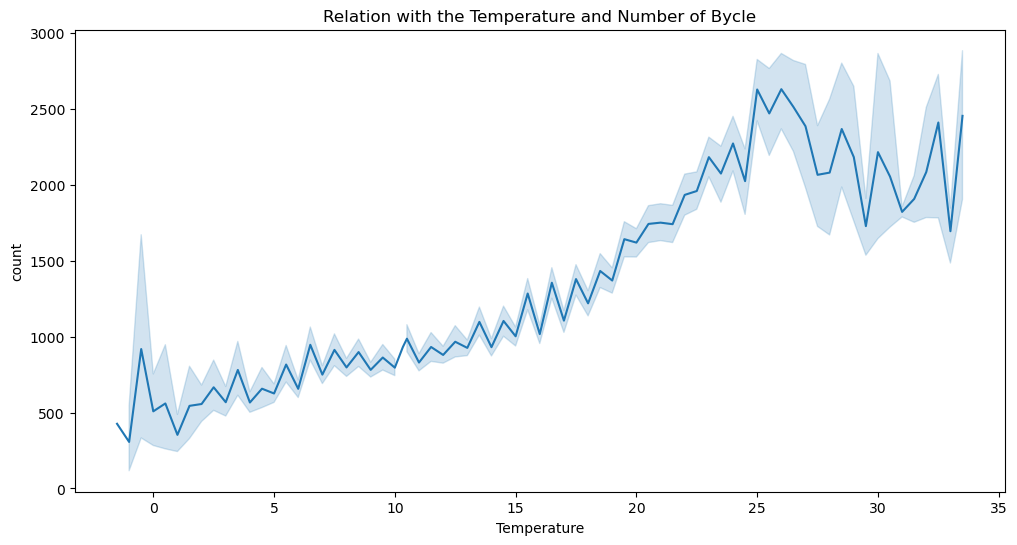

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes, x="temp_real_C", y="count")
plt.title("Relation with the Temperature and Number of Bycle")
plt.xlabel("Temperature")

plt.show()

**It looks like there is some correlation between the temperature of the day and the bikes rented.**
- As the temperature decreases under 3 degrees, the bikes count drops drastically.
- Rental counts escalate with rising temperatures.

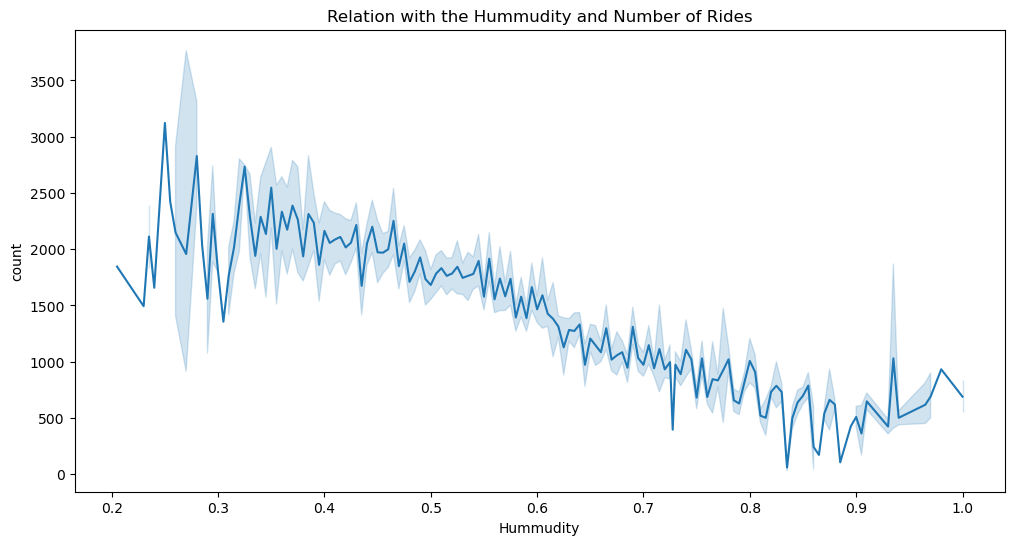

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes, x="humidity_percent", y="count")
plt.title("Relation with the Hummudity and Number of Rides")
plt.xlabel("Hummudity")

plt.show()

**There's an inverse relationship between rental count and humidity.**

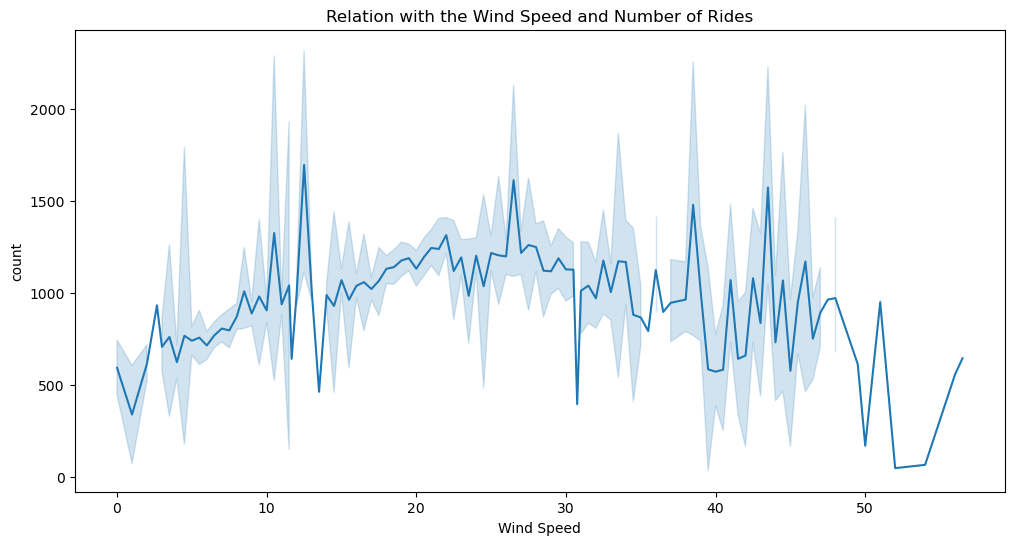

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes, x="wind_speed_kph", y="count")
plt.title("Relation with the Wind Speed and Number of Rides")
plt.xlabel("Wind Speed")

plt.show()

**There is a parabolic relationship between wind speed and bicycle hire. While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.**

# Tableau Dashboard

<a href="https://public.tableau.com/app/profile/federico.maguire/viz/LondonBikeRidesInteractiveDashboard_17006937338830/Dashboard1" style="font-size: 22px;">Bike Rides Dashboard link</a>

# Conclusions

**Peak Business Hours:** The significant business peaks occur from 7 to 9 AM and 4 to 7 PM. During these times, exploring their importance to the business and potential opportunities for service enhancement can be beneficial.

**Weekday Analysis:** The analysis of weekdays reveals an almost equal rental count of 280. This suggests opportunities to devise strategies for targeting diverse customer segments specifically on weekdays.

**Holiday Rentals:** There's a noticeable increase in rentals during holidays. It's advisable to consider marketing initiatives to capitalize on the higher demand during holidays.

**Weather Impact:** Weather significantly affects user behavior, as observed. Adjustments to business operations in response are recommended.

- **Segmenting Rental Counts by Weather Conditions:**
    - Clear, few clouds, partly cloudy conditions correlate with approximately 290 rentals.
    - Misty weather variations like Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist lead to around 250 rentals.
    - Conditions involving Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds witness a decrease to 150 rentals.
    - During Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog, approximately 110 rentals are expected.
    - Rental counts escalate with rising temperatures.
    - There's an inverse relationship between rental count and humidity, as anticipated. Thus, optimizing overall performance through business and operational strategies is suggested.
    - While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

## It might be worth considering the application of Regression in your machine learning approach for this dataset.
**Regression stands out as the preferred choice for predictive modeling due to its alignment with the dataset's characteristics, interpretability, and proven performance evaluation methods. Its utilization lays a strong groundwork for comprehending and forecasting bike rental counts.**

**To proceed with the Regression model, a new Jupyter Notebook dedicated to Regression analysis can be created..**